In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("measurements.csv")

In [3]:
df.shape

(388, 12)

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


#方向性
・distance：対数変換
・specials, gas_type, refill gas：横持ち変換
・refill liters:欠損値補完は0or NaNのまま？

In [5]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [6]:
# カンマ→小数点変換
df['consume']= df['consume'].str.replace(',' ,  '.').astype(float)

In [7]:
df['temp_inside']= df['temp_inside'].str.replace(',' ,  '.').astype(float)

In [8]:
df['distance']= df['distance'].str.replace(',' ,  '.').astype(float)

In [9]:
df['refill liters']= df['refill liters'].str.replace(',' ,  '.').astype(float)

In [10]:
# 外気温と内気温の差
df['temp_margin'] = df['temp_inside'] - df['temp_outside']
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,temp_margin
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10,9.5
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,8.5
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,6.5
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,7.5
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,6.5


In [11]:
# 目的変数と各説明変数の相関関係
for target in [df['distance'], df['speed'], df['temp_inside'], df['temp_outside'], df['AC'], df['rain'], df['sun'], df['refill liters'], df['temp_margin']]:
    sex = df['distance'].corr(target)
    print(sex)

1.0
0.5622988220307998
0.07530506943319172
0.08817534104170642
-0.025738166526216563
-0.019790653237097656
0.0811198142145645
0.13285150768111637
-0.0793662417814713


In [12]:
# 変換後のデータ型確認
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
temp_margin      float64
dtype: object

In [13]:
df = df.fillna(0)

In [14]:
df.isnull().any(axis = 0)

distance         False
consume          False
speed            False
temp_inside      False
temp_outside     False
specials         False
gas_type         False
AC               False
rain             False
sun              False
refill liters    False
refill gas       False
temp_margin      False
dtype: bool

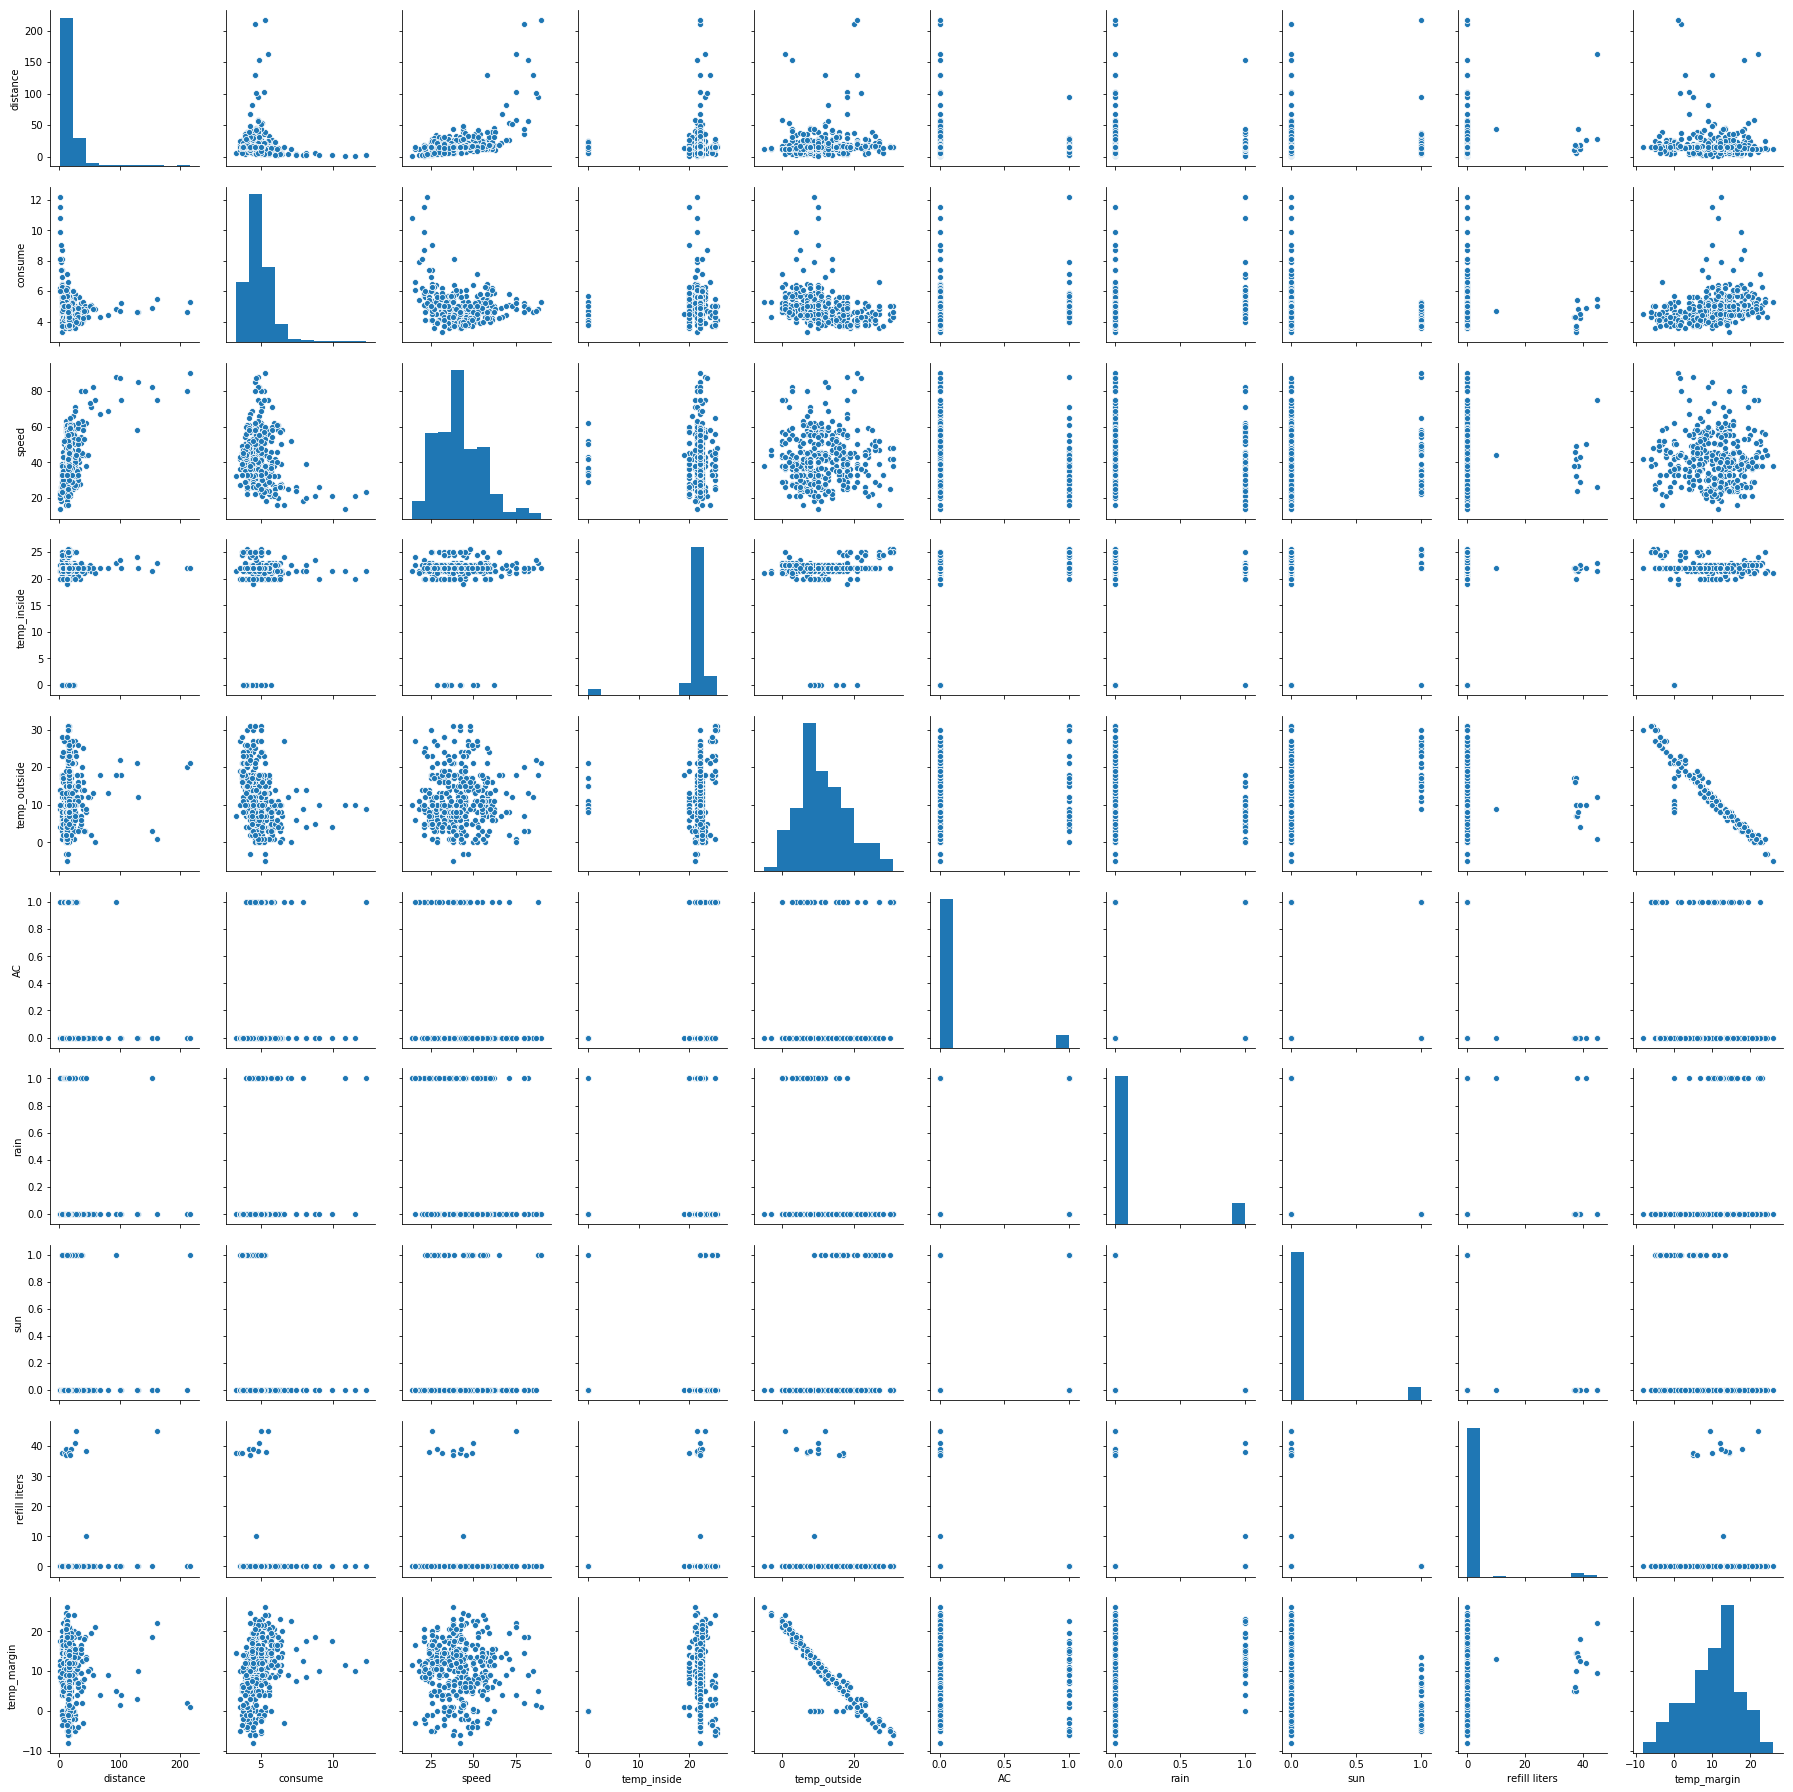

In [15]:
# 散布図行列を作成
import seaborn as sns
sns.pairplot(df)

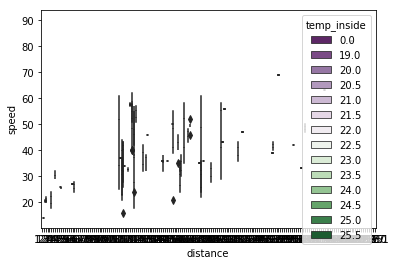

In [16]:
sns.boxplot(x = 'distance', y = 'speed', hue = 'temp_inside', data = df, palette = 'PRGn')

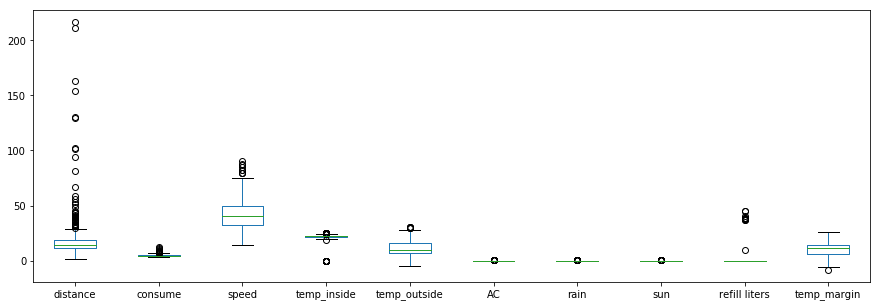

In [17]:
df.plot.box(figsize=(15,5))

In [18]:
# specials, gas_type, refill gas：横持ち変換
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [19]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,temp_margin
0,28.0,5.0,26,21.5,12,0,E10,0,0,0,45.0,E10,9.5
1,12.0,4.2,30,21.5,13,0,E10,0,0,0,0.0,0,8.5
2,11.2,5.5,38,21.5,15,0,E10,0,0,0,0.0,0,6.5
3,12.9,3.9,36,21.5,14,0,E10,0,0,0,0.0,0,7.5
4,18.5,4.5,46,21.5,15,0,E10,0,0,0,0.0,0,6.5


In [20]:
# specialsのユニークコードはAC（ac）,rain(halfあり),snow（halfあり）,sunの4分類ぽい
# →AC, rain, sunは既にone-hotになっているのでsnowだけ取り出す
pd.unique(df['specials'])

array([0, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [21]:
# gas_type, refill gasをone hot変換（specialsは）
new_data = pd.get_dummies(df['specials'])
new_data = new_data['snow']
new_data.head()

0    0
1    0
2    0
3    0
4    0
Name: snow, dtype: uint8

In [22]:
new_data2 = pd.get_dummies(df['gas_type'])
new_data2 = new_data2.rename(columns={'E10': 'gas_type_E10','SP98': 'gas_type_SP98' } )
new_data2.head()

,gas_type_E10,gas_type_SP98
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [23]:
new_data3 = pd.get_dummies(df['refill gas'])
new_data3 = new_data3.rename(columns={'E10': 'refill gas_E10','SP98': 'refil gas_SP98' } )
new_data3.head()

,0,refill gas_E10,refil gas_SP98
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
df_addcol = pd.concat([df, new_data, new_data2, new_data3], axis =1)
df_addcol.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,temp_margin,snow,gas_type_E10,gas_type_SP98,0,refill gas_E10,refil gas_SP98
0,28.0,5.0,26,21.5,12,0,E10,0,0,0,45.0,E10,9.5,0,1,0,0,1,0
1,12.0,4.2,30,21.5,13,0,E10,0,0,0,0.0,0,8.5,0,1,0,1,0,0
2,11.2,5.5,38,21.5,15,0,E10,0,0,0,0.0,0,6.5,0,1,0,1,0,0
3,12.9,3.9,36,21.5,14,0,E10,0,0,0,0.0,0,7.5,0,1,0,1,0,0
4,18.5,4.5,46,21.5,15,0,E10,0,0,0,0.0,0,6.5,0,1,0,1,0,0


In [25]:
df2= df_addcol[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside','temp_margin', 'AC', 'rain', 'sun', 'refill liters', 'gas_type_E10', 'gas_type_SP98', 'refill gas_E10', 'refil gas_SP98']]
df2.head()

,distance,consume,speed,temp_inside,temp_outside,temp_margin,AC,rain,sun,refill liters,gas_type_E10,gas_type_SP98,refill gas_E10,refil gas_SP98
0,28.0,5.0,26,21.5,12,9.5,0,0,0,45.0,1,0,1,0
1,12.0,4.2,30,21.5,13,8.5,0,0,0,0.0,1,0,0,0
2,11.2,5.5,38,21.5,15,6.5,0,0,0,0.0,1,0,0,0
3,12.9,3.9,36,21.5,14,7.5,0,0,0,0.0,1,0,0,0
4,18.5,4.5,46,21.5,15,6.5,0,0,0,0.0,1,0,0,0


In [26]:
df2.isnull().sum()

distance          0
consume           0
speed             0
temp_inside       0
temp_outside      0
temp_margin       0
AC                0
rain              0
sun               0
refill liters     0
gas_type_E10      0
gas_type_SP98     0
refill gas_E10    0
refil gas_SP98    0
dtype: int64

In [27]:
# distance対数変換
df_log = np.log(df['distance'])
df_log.head()

0    3.332205
1    2.484907
2    2.415914
3    2.557227
4    2.917771
Name: distance, dtype: float64

In [28]:
df2['distance'] = df_log
df2.head()

/Users/user/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,distance,consume,speed,temp_inside,temp_outside,temp_margin,AC,rain,sun,refill liters,gas_type_E10,gas_type_SP98,refill gas_E10,refil gas_SP98
0,3.332205,5.0,26,21.5,12,9.5,0,0,0,45.0,1,0,1,0
1,2.484907,4.2,30,21.5,13,8.5,0,0,0,0.0,1,0,0,0
2,2.415914,5.5,38,21.5,15,6.5,0,0,0,0.0,1,0,0,0
3,2.557227,3.9,36,21.5,14,7.5,0,0,0,0.0,1,0,0,0
4,2.917771,4.5,46,21.5,15,6.5,0,0,0,0.0,1,0,0,0


In [29]:
def outlier_2s(df2):
    # for i in range(len(df.columns)):
    for i in range(len(df2.columns)):

        # 列を抽出する
        # col = df.iloc[:,i]
        col = df2.iloc[:,i]

        # 平均と標準偏差
        average = np.mean(col)
        sd = np.std(col)

        # 外れ値の基準点
        outlier_min = average - (sd) * 2
        outlier_max = average + (sd) * 2

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df2

In [30]:
df2.isnull().sum()

distance          0
consume           0
speed             0
temp_inside       0
temp_outside      0
temp_margin       0
AC                0
rain              0
sun               0
refill liters     0
gas_type_E10      0
gas_type_SP98     0
refill gas_E10    0
refil gas_SP98    0
dtype: int64

In [31]:
df2 = df2.dropna(how='any', axis=0)
df2.shape

(388, 14)

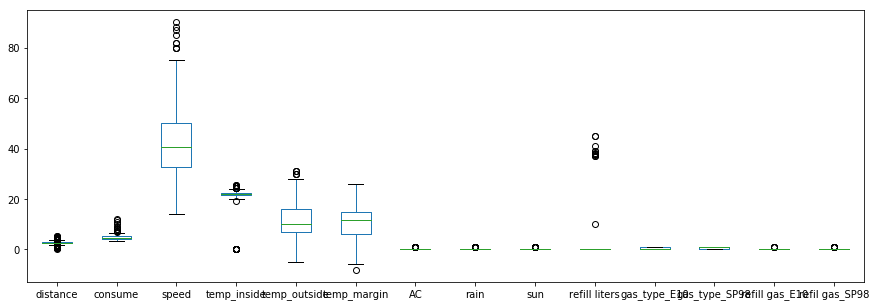

In [32]:
df2.plot.box(figsize=(15,5))

In [33]:
df2['refill liters'].head(15)

0     45.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
Name: refill liters, dtype: float64

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
X = df2.iloc[:,[0,2,3,4,7,8,9]]
y = df2.iloc[:,1]
X.head()

,distance,speed,temp_inside,temp_outside,rain,sun,refill liters
0,3.332205,26,21.5,12,0,0,45.0
1,2.484907,30,21.5,13,0,0,0.0
2,2.415914,38,21.5,15,0,0,0.0
3,2.557227,36,21.5,14,0,0,0.0
4,2.917771,46,21.5,15,0,0,0.0


In [36]:
y.head()

0    5.0
1    4.2
2    5.5
3    3.9
4    4.5
Name: consume, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 1)

In [38]:
model = DecisionTreeRegressor()

In [39]:
model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
model.score(X_test,y_test)

0.9894959786249404

In [41]:
y_pred = model.predict(X_test)

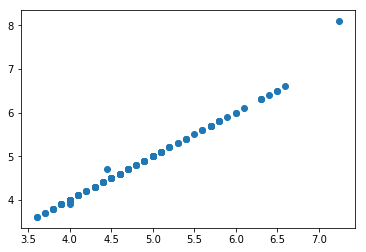

In [42]:
plt.scatter(y_pred, y_test)

In [43]:
model.score(X_train, y_train)

0.995830997380583

In [44]:
mean_absolute_error(y_test, y_pred)

0.010256410256410255

In [45]:
mean_squared_error(y_test, y_pred)

0.006794871794871789

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.08243101233681283